# Image recognition using CNN on CIFAR-10 Dataset


importing necessary libraries


In [1]:
from tensorflow.keras import Sequential, datasets
from tensorflow.keras.layers import Dense, Flatten
from tensorflow.keras.layers import Conv2D, MaxPooling2D
import numpy as np
from matplotlib import pyplot as plt
import os

In [2]:
os.environ['TF_XLA_FLAGS']='--tf_xla_enable_xla_devices'

load dataset

In [3]:
(X_train, y_train),(X_test, y_test)=datasets.cifar10.load_data()

170498071/170498071 [==============================] - 6s 0us/step


In [4]:
X_train.shape

(50000, 32, 32, 3)

In [5]:
X_test.shape

(10000, 32, 32, 3)

Reshape

In [6]:
y_train=y_train.reshape(-1, )
y_train

array([6, 9, 9, ..., 9, 1, 1], dtype=uint8)

In [7]:
y_classes=["airplane", "automobile", "bird", "cat", "deer", "dog", "frog", "horse", "ship", "truck"]

In [8]:
len(y_classes)

10

Observe dataset

In [9]:
def showImage(x, y, index):
  plt.figure(figsize=(15, 2))
  plt.imshow(x[index])
  plt.xlabel(y_classes[y[index]])

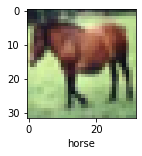

In [10]:
showImage(X_train, y_train, 7)

Normalize dataset

In [11]:
X_train=X_train/255
X_test=X_test/255

# Build model

In [12]:
model=Sequential()
model.add(Conv2D(filters=32, kernel_size=(3,3), activation="relu", input_shape=(32, 32, 3)))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(filters=64, kernel_size=(4, 4), activation="relu"))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Flatten())
model.add(Dense(units=34, activation="relu"))
model.add(Dense(units=10, activation="softmax"))

# Compile model

In [13]:
model.compile(
    optimizer="adam",
    loss="sparse_categorical_crossentropy",
    metrics=["accuracy"]
)

## Train model

In [14]:
model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=5)

Epoch 1/5
1563/1563 [==============================] - 95s 60ms/step - loss: 1.5784 - accuracy: 0.4303 - val_loss: 1.3023 - val_accuracy: 0.5326
Epoch 2/5
1563/1563 [==============================] - 93s 59ms/step - loss: 1.2065 - accuracy: 0.5694 - val_loss: 1.1633 - val_accuracy: 0.5820
Epoch 3/5
1563/1563 [==============================] - 93s 59ms/step - loss: 1.0560 - accuracy: 0.6284 - val_loss: 1.0115 - val_accuracy: 0.6418
Epoch 4/5
1563/1563 [==============================] - 93s 60ms/step - loss: 0.9695 - accuracy: 0.6612 - val_loss: 0.9973 - val_accuracy: 0.6489
Epoch 5/5
1563/1563 [==============================] - 95s 61ms/step - loss: 0.9055 - accuracy: 0.6831 - val_loss: 0.9558 - val_accuracy: 0.6710


Make predictions


In [15]:
y_prediction = model.predict(X_test)

313/313 [==============================] - 5s 15ms/step


In [16]:
y_prediction=[np.argmax(arr) for arr in y_prediction]
y_prediction

[3,
 8,
 8,
 0,
 4,
 6,
 1,
 6,
 3,
 1,
 0,
 9,
 3,
 7,
 9,
 6,
 5,
 5,
 8,
 6,
 7,
 2,
 4,
 9,
 4,
 2,
 4,
 0,
 9,
 6,
 6,
 5,
 4,
 3,
 9,
 9,
 4,
 9,
 9,
 5,
 0,
 6,
 5,
 6,
 0,
 9,
 3,
 7,
 4,
 6,
 7,
 8,
 6,
 3,
 8,
 8,
 7,
 3,
 5,
 3,
 7,
 3,
 6,
 0,
 6,
 2,
 1,
 2,
 5,
 7,
 4,
 6,
 8,
 8,
 9,
 2,
 0,
 3,
 3,
 8,
 8,
 1,
 1,
 7,
 2,
 7,
 2,
 0,
 9,
 9,
 0,
 6,
 8,
 6,
 4,
 6,
 6,
 0,
 2,
 3,
 4,
 5,
 6,
 6,
 1,
 1,
 2,
 6,
 3,
 5,
 4,
 0,
 2,
 2,
 9,
 5,
 0,
 4,
 6,
 5,
 8,
 2,
 6,
 2,
 8,
 0,
 8,
 5,
 6,
 0,
 4,
 9,
 8,
 9,
 1,
 2,
 9,
 7,
 2,
 0,
 6,
 5,
 6,
 5,
 8,
 7,
 6,
 5,
 5,
 5,
 8,
 9,
 6,
 0,
 0,
 6,
 6,
 9,
 3,
 4,
 3,
 1,
 6,
 6,
 0,
 7,
 8,
 6,
 9,
 0,
 9,
 9,
 9,
 8,
 9,
 9,
 3,
 7,
 5,
 9,
 0,
 5,
 6,
 2,
 4,
 8,
 6,
 2,
 3,
 0,
 6,
 3,
 0,
 9,
 7,
 4,
 8,
 3,
 2,
 8,
 5,
 9,
 8,
 7,
 1,
 5,
 8,
 4,
 7,
 9,
 6,
 9,
 5,
 9,
 0,
 2,
 3,
 9,
 8,
 4,
 7,
 4,
 9,
 4,
 4,
 9,
 3,
 2,
 5,
 6,
 5,
 9,
 5,
 1,
 8,
 0,
 4,
 0,
 3,
 5,
 1,
 1,
 1,
 9,
 0,
 6,
 0,
 8,
 5,
 0,


In [17]:
y_prediction[9] #ship in y_classes

1

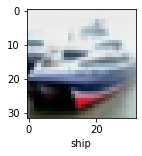

In [18]:
y_test=y_test.reshape(-1, )
showImage(X_test, y_test, 1)

In [20]:
model.evaluate(X_test, y_test)

TypeError: ignored

In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_prediction))

              precision    recall  f1-score   support

           0       0.71      0.72      0.72      1000
           1       0.76      0.85      0.80      1000
           2       0.60      0.51      0.55      1000
           3       0.49      0.47      0.48      1000
           4       0.66      0.60      0.63      1000
           5       0.59      0.60      0.60      1000
           6       0.80      0.73      0.76      1000
           7       0.63      0.83      0.72      1000
           8       0.72      0.83      0.77      1000
           9       0.87      0.66      0.75      1000

    accuracy                           0.68     10000
   macro avg       0.68      0.68      0.68     10000
weighted avg       0.68      0.68      0.68     10000



In [ ]:
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(y_test, y_prediction)
print(cm)

[[721  25  47  26   9   5   2  29 118  18]
 [ 20 847   8  10   3   6   8   8  42  48]
 [ 73  10 506  79  99  80  48  78  24   3]
 [ 23  16  78 471  68 179  52  71  34   8]
 [ 22   6  63  63 599  37  42 146  20   2]
 [ 16   4  51 162  42 600  18  90  13   4]
 [  7   8  46  89  45  36 731  24  11   3]
 [ 11   1  25  27  36  52   4 834   6   4]
 [ 78  39   8  10   7   6   1  17 828   6]
 [ 39 159  11  17   4  11   6  34  57 662]]


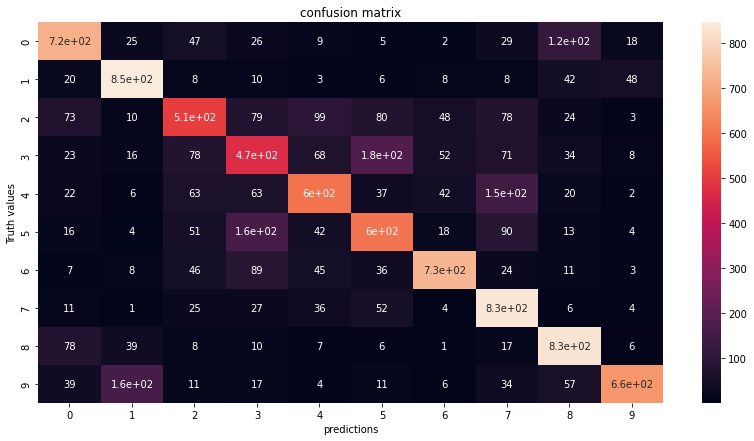

In [ ]:
import seaborn as sns

plt.figure(figsize=(14, 7))
sns.heatmap(cm, annot=True)
plt.ylabel("Truth values")
plt.xlabel("predictions")
plt.title("confusion matrix")
plt.show()